In [2]:
#%pip install mlxtend

In [ ]:
#https://www.youtube.com/watch?v=AvVEFcxDSts

## SequentialFeatureSelector

##### Why SequentialFeatureSelector is better than ScikitLearn Recursive Feature Elimination (RFE)

sklearn.feature_selection.RFE? RFE is computationally less complex using the feature weight coefficients (e.g., linear models) or feature importance (tree-based algorithms) to eliminate features recursively, 
whereas SFSs eliminate (or add) features based on a user-defined classifier/regression performance metric.

In [3]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

### Sequential Backward Selection (SBS): 
#### 1- start with all the features in the dataset, and then we evaluate the performance of the algorithm
####  2- Least significant feature is removed one byone
#### 3- until a certain criterion is satisfied.

### Sequential Forward Selection (SBS) 

#### 1- nitialize the algorithm with an empty set
#### 2- Features are added by one by one (best one comes first)
#### 3- 3- until a certain criterion is satisfied.

In [9]:
# SequentialFeatureSelector(estimator, k_features=1, forward=True, 
#                           floating=False, verbose=0, scoring=None, cv=5, n_jobs=1, pre_dispatch='2n_jobs', 
#                           clone_estimator=True, fixed_features=None)

### Classification

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=4)

In [7]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, ### false will be Backward
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)

feature_names = ('sepal length', 'sepal width', 'petal length', 'petal width')### not necesary
sfs1 = sfs1.fit(X, y ) #custom_feature_names=feature_names
sfs1.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `p

{1: {'feature_idx': (3,),
  'cv_scores': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ]),
  'avg_score': 0.96,
  'feature_names': ('3',)},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ]),
  'avg_score': 0.9666666666666668,
  'feature_names': ('2', '3')},
 3: {'feature_idx': (0, 2, 3),
  'cv_scores': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 0.96666667]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('0', '2', '3')}}

In [11]:
import pandas as pd
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(3,)",0.032061,0.024944,0.012472
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(2, 3)",0.027096,0.021082,0.010541
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.953333,"(0, 2, 3)",0.020989,0.01633,0.008165


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `p

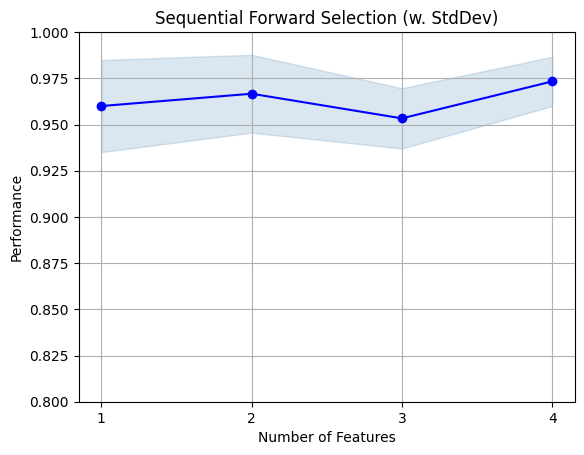

In [12]:
sfs = SFS(knn, 
          k_features=4, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=5)

sfs = sfs.fit(X, y)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

### Regression

In [15]:
from sklearn.linear_model import LinearRegression
#from sklearn.datasets import load_boston

boston = pd.read_csv("BostonHousing.csv")
boston.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [25]:
boston.dropna(inplace=True)

In [26]:
X= boston.iloc[:,:-1]
y =  boston.iloc[:,-1]

In [27]:
X.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
dtype: int64

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated a

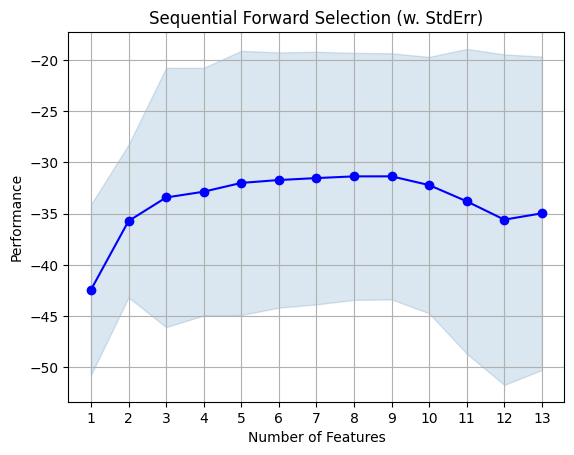

In [28]:
lr = LinearRegression()

sfs = SFS(lr, 
          k_features=13, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

## Feature Importance Permutation

#### Take a model that was fit to the training dataset
#### Estimate the predictive performance of the model on an independent dataset (e.g., validation dataset) and record it as the baseline performance
#### For each feature i:
 ##### randomly permute feature column i in the original dataset
 #### record the predictive performance of the model on the dataset with the permuted column
 #### compute the feature importance as the difference between the baseline performance (step 2) and the performance on the permuted dataset

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import feature_importance_permutation

In [30]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=10000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [31]:
forest = RandomForestClassifier(n_estimators=250,
                                random_state=0)

forest.fit(X_train, y_train)

print('Training accuracy:', np.mean(forest.predict(X_train) == y_train)*100)
print('Test accuracy:', np.mean(forest.predict(X_test) == y_test)*100)

importance_vals = forest.feature_importances_
print(importance_vals)

Training accuracy: 100.0
Test accuracy: 95.06666666666666
[0.283357   0.30846795 0.24204291 0.02229767 0.02364941 0.02390578
 0.02501543 0.0234225  0.02370816 0.0241332 ]


In [32]:
imp_vals, orgin_value = feature_importance_permutation(
    predict_method=forest.predict, 
    X=X_test,
    y=y_test,
    metric='accuracy',
    num_rounds=3, ####If num_rounds > 1, the permutation is repeated multiple times (with different random seeds
    seed=1)

imp_vals ### mean values of rounds

array([ 0.26      ,  0.26511111,  0.25977778, -0.00155556, -0.00044444,
        0.        ,  0.00144444,  0.        , -0.00088889, -0.00222222])

In [33]:
orgin_value 

array([[ 0.26833333,  0.254     ,  0.25766667],
       [ 0.26733333,  0.274     ,  0.254     ],
       [ 0.261     ,  0.25766667,  0.26066667],
       [-0.002     , -0.00133333, -0.00133333],
       [-0.00033333, -0.00133333,  0.00033333],
       [ 0.00066667,  0.001     , -0.00166667],
       [ 0.00233333, -0.00033333,  0.00233333],
       [ 0.00066667,  0.00033333, -0.001     ],
       [ 0.00066667, -0.00166667, -0.00166667],
       [-0.00233333, -0.00233333, -0.002     ]])

In [34]:
(.26833333+0.254
+0.25766667)/3

0.25999999999999995